In [8]:
# Import packages
import xarray as xr
import numpy as np
import math
import matplotlib.pyplot as plt

# Empirical analytical  sea ice growth model
Following Climate System Modelling, Kevin E. Trenberth Chapter - W.D. Hibler and G. M. Flato: Sea ice models.

We first define a degree day, $\theta(t)$ where:
$$ \theta(t) = \int_0^t (T_f-T_a)dt $$
and $T_f$ is the freezing temperature of sea water, and $T_a$ is the air temperature. The bottom temperature of the ice $T_B$ is usually taken as being the same as $T_f$. A good empirical approximation to ice thickness, $H$, as a function of degree days based on data analysis, is given by Anderson (1961):
$$H^2 + 5.1H = 6.7\theta$$
where $H$ is in cm and $\theta$ has units of $^{\circ}C$ day.

In [8]:
# Parameters
# Model timestep
dt = 1.0 # days
# Freezing temperature of sea water
T_f = -1.8 #° C

# Initial air temperature
T_a = -10.0 #° C

theta_t = (T_f - T_a)*dt
theta_t

H^2 + 5.1H = 6.7*theta_t

SyntaxError: invalid decimal literal (2275531989.py, line 13)

In [44]:
def ice_thickness_per_degree_day(H, H_s):
    return H + 12.9/(2*H + 13.1*H_s + 16.8)

def empirical_model(H_0, H_s, theta_t_max):
    H = np.zeros(theta_t_max)
    # Initialisation
    H[0] = ice_thickness_per_degree_day(H_0, H_s)
    for t in range(theta_t_max-1):
        H[t+1] = ice_thickness_per_degree_day(H[t], H_s)
    return H
# Parameters and initialisation
H_s = 5
H_0 = 0 # cm
theta_t_max = 2000 # Maximum degree days




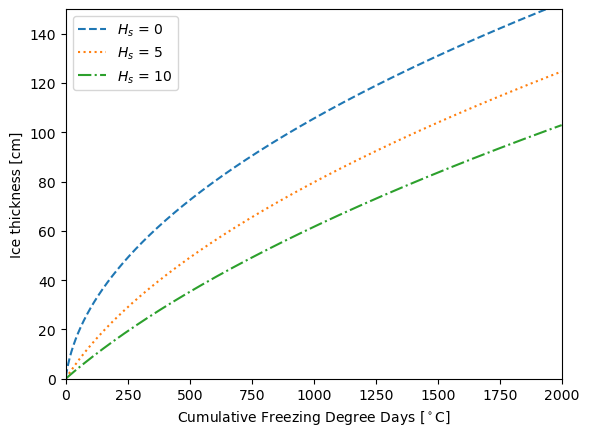

In [54]:
H_s_0 = empirical_model(H_0, 0, theta_t_max)
H_s_5 = empirical_model(H_0, 5, theta_t_max)
H_s_10 = empirical_model(H_0, 10, theta_t_max)
plt.plot(range(theta_t_max), H_s_0, label=f'$H_s$ = {0}', linestyle='--')
plt.plot(range(theta_t_max), H_s_5, label=f'$H_s$ = {5}', linestyle=':')
plt.plot(range(theta_t_max), H_s_10, label=f'$H_s$ = {10}', linestyle='-.')
plt.xlabel('Cumulative Freezing Degree Days [$^\circ$C]')
plt.ylabel('Ice thickness [cm]')
plt.xlim((0,2000))
plt.ylim((0,150))
plt.legend()

From the result it is evident that the growth slows down drastically once the ice gets thicker than about 20 cm.

Adding some simple thermodynamics.

In [ ]:
def simple_thermodynamic_model(H_0, H_s, theta_t_max):
    dH_dt = (gamma*(T_B - T_0) - F_w)/(rho_i*L)

# UW – Climate Modeling ATMS/ESS 559 OCN 558

$$ c \frac{dT}{dt} = -\beta T - \gamma (T-T_0) + \mathcal{F}(t) $$
$$ c_0 \frac{dT_0}{dt} = \gamma (T-T_0) $$

In [2]:
# Parameters
specificHeat = 3985 # J/kg/C
mixedLayerDepth = 50 # m
deepOceanDepth = 4000 # m
rho_ocean = 1025 # kg m^-3

# Heat capacity for mixed-layer ocean
c = mixedLayerDepth * rho_ocean * specificHeat

# Heat capacity for deep ocean
c_0 = deepOceanDepth * rho_ocean * specificHeat


In [12]:
# Model
def update_mixed_layer(T, T_0, F, beta, gamma, c, dt):
    dT = (-beta*T - gamma*(T-T_0) + F)/c
    return T + dT*dt

def update_deep_ocean(T, T_0, gamma, c_0, dt):
    dT_0 = gamma*(T-T_0)/c_0
    return T_0 + dT_0*dt

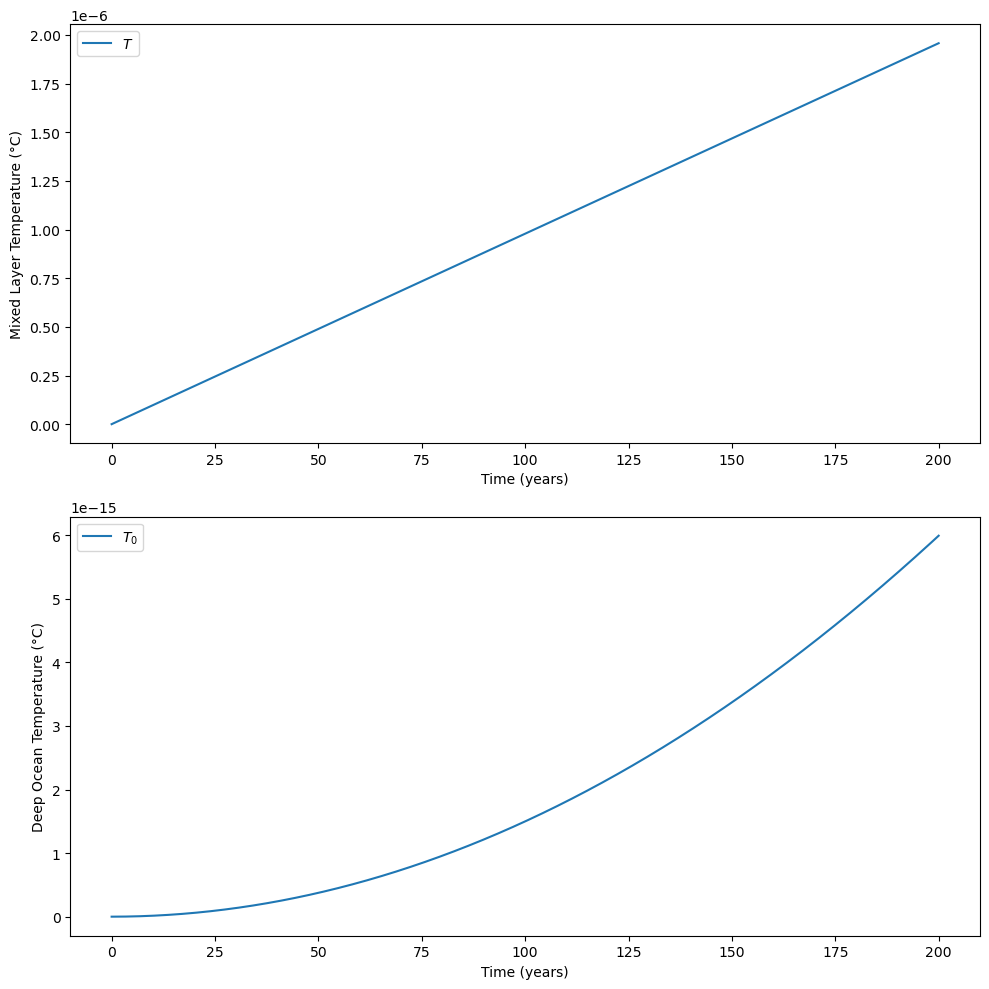

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
specific_heat = 3985  # J/kg/C
mixed_layer_depth = 50  # m
deep_ocean_depth = 4000  # m
rho_ocean = 1025  # kg/m^3
beta = 1.2  # W m^-2 K^-1
gamma = 0.5  # W m^-2 K^-1
dt = 1/12  # one month in years
max_t = 200  # years

# Heat capacities
c = mixed_layer_depth * rho_ocean * specific_heat  # Heat capacity for mixed-layer ocean
c_0 = deep_ocean_depth * rho_ocean * specific_heat  # Heat capacity for deep ocean

# Time steps
max_timesteps = int(np.round(max_t/dt))

# Forcing
Forcing = np.full(max_timesteps, 2)  # W m^-2

# Temperature arrays
Temp = np.zeros(max_timesteps)
Temp_0 = np.zeros(max_timesteps)

# Initial conditions
Temp[0] = 0.0  # C
Temp_0[0] = 0.0  # C

# Euler forward method to solve the coupled ODEs
for timestep in range(max_timesteps - 1):
    T = Temp[timestep]
    T_0 = Temp_0[timestep]
    F = Forcing[timestep]

    # Update mixed layer temperature (T)
    dT = (-beta * T - gamma * (T - T_0) + F) / c
    Temp[timestep + 1] = T + dT * dt

    # Update deep ocean temperature (T_0) using the updated T
    T = Temp[timestep + 1]
    dT_0 = gamma * (T - T_0) / c_0
    Temp_0[timestep + 1] = T_0 + dT_0 * dt

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Temperature T
ax1.plot(np.linspace(0, max_t, max_timesteps), Temp, label='$T$')
ax1.set_xlabel('Time (years)')
ax1.set_ylabel('Mixed Layer Temperature (°C)')
ax1.legend()

# Temperature T_0
ax2.plot(np.linspace(0, max_t, max_timesteps), Temp_0, label='$T_0$')
ax2.set_xlabel('Time (years)')
ax2.set_ylabel('Deep Ocean Temperature (°C)')
ax2.legend()

plt.tight_layout()
plt.show()


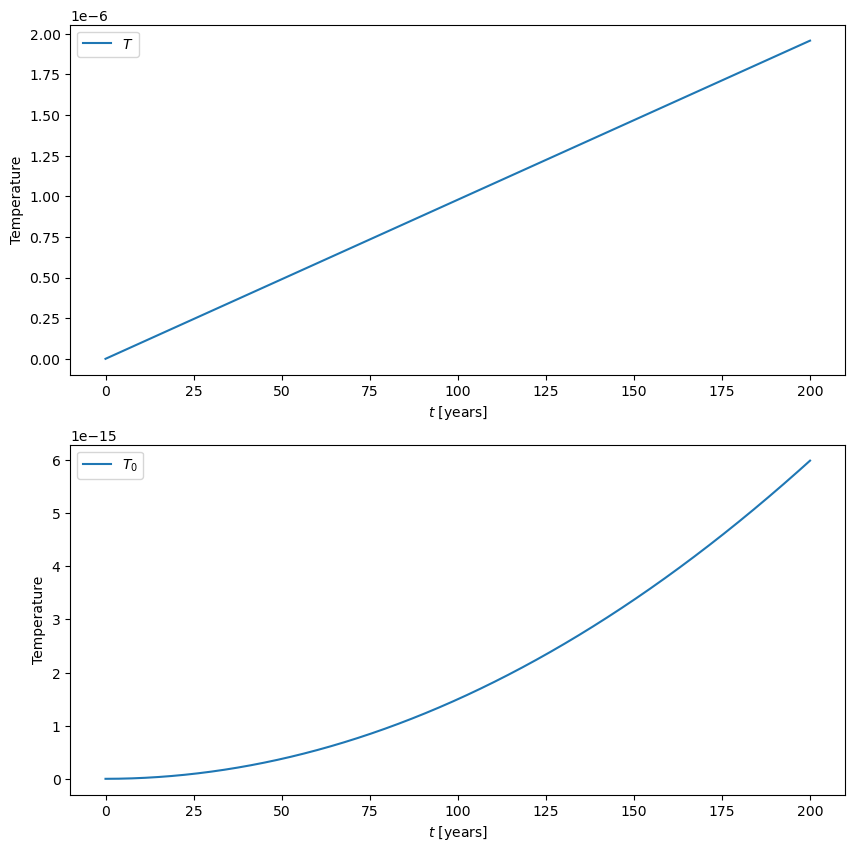

In [15]:
# Case 1: Linear forcing

t = 0.0 # model time
max_t = 200 # years
dt = 1/12 # one month in years
max_timesteps = int(np.round(max_t/dt))
beta = 1.2 # W m^-2 K^-1
gamma = 0.5 # W m^-2 K^-1

Forcing = np.full(max_timesteps, 2) # W m^-2
Temp = np.zeros(max_timesteps)
Temp_0 = np.zeros(max_timesteps)

# Initialise
Temp[0] = 0.0 # C
Temp_0[0] = 0.0

for timestep in range(max_timesteps-1): 
    F = Forcing[timestep]
    #F = np.random.normal(0, 1, 1)

    T = Temp[timestep]
    T_0 = Temp_0[timestep]
    # Update MLD temperature
    Temp[timestep+1] = update_mixed_layer(T, T_0, F, beta, gamma, c, dt)

    # Update deep ocean
    T = Temp[timestep+1]
    Temp_0[timestep+1] = update_deep_ocean(T, T_0, gamma, c_0, dt)

    t += dt
    if t > max_t:
        print('Maximum time elapsed')
        break


fig = plt.figure(figsize=[10, 10])

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(np.linspace(0,max_t,max_timesteps), Temp, label='$T$')

ax1.set_xlabel('$t$ [years]')
ax1.set_ylabel('Temperature')
ax1.legend()

ax2.plot(np.linspace(0,max_t,max_timesteps), Temp_0, label='$T_0$')

ax2.set_xlabel('$t$ [years]')
ax2.set_ylabel('Temperature')
ax2.legend()

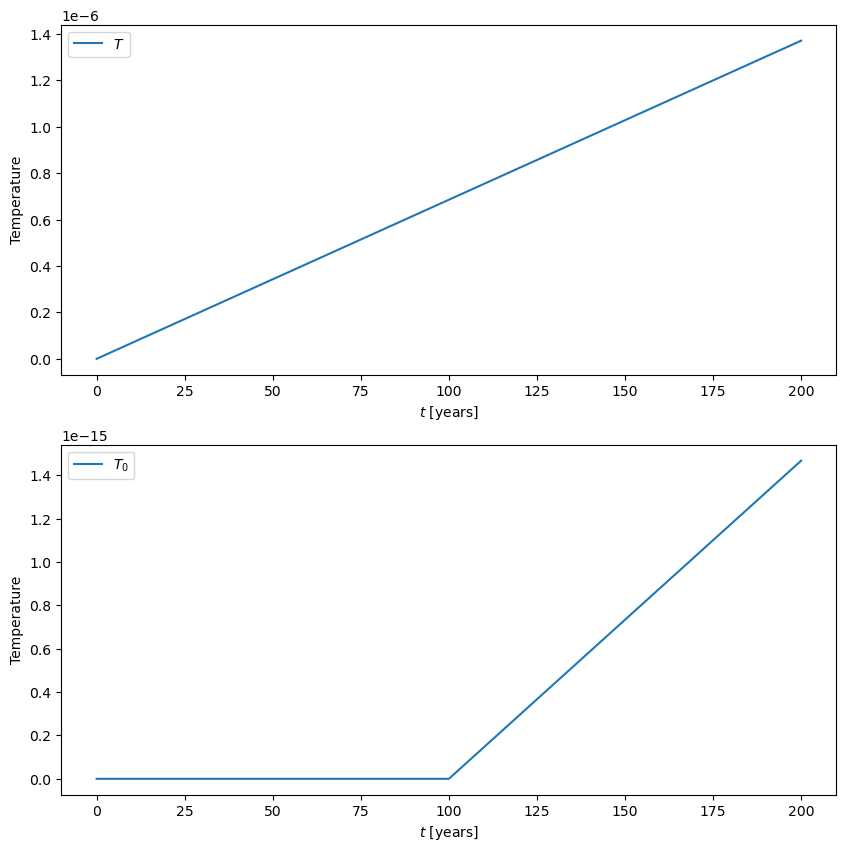

In [17]:
# Case 2: Numerically unstable

t = 0.0 # model time
max_t = 200 # years
dt = 70 #1/12 # one month in years
max_timesteps = int(np.round(max_t/dt))


beta = 1.2 # W m^-2 K^-1
gamma = 0.5 # W m^-2 K^-1

Forcing = np.full(max_timesteps, 2) # W m^-2
Temp = np.zeros(max_timesteps)
Temp_0 = np.zeros(max_timesteps)

# Initialise
Temp[0] = 0.0
Temp_0[0] = 0.0

for timestep in range(max_timesteps-1): 
    F = Forcing[timestep]
    #F = np.random.normal(0, 1, 1)

    T = Temp[timestep]
    T_0 = Temp_0[timestep]
    Temp[timestep+1] = update_mixed_layer(T, T_0, F, beta, gamma, c, dt)

    T = Temp[timestep]
    Temp_0[timestep+1] = update_deep_ocean(T, T_0, gamma, c_0, dt)

    t += dt
    if t > max_t:
        print('Maximum time elapsed')
        break


fig = plt.figure(figsize=[10, 10])

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(np.linspace(0,max_t,max_timesteps), Temp, label='$T$')

ax1.set_xlabel('$t$ [years]')
ax1.set_ylabel('Temperature')
ax1.legend()

ax2.plot(np.linspace(0,max_t,max_timesteps), Temp_0, label='$T_0$')

ax2.set_xlabel('$t$ [years]')
ax2.set_ylabel('Temperature')
ax2.legend()

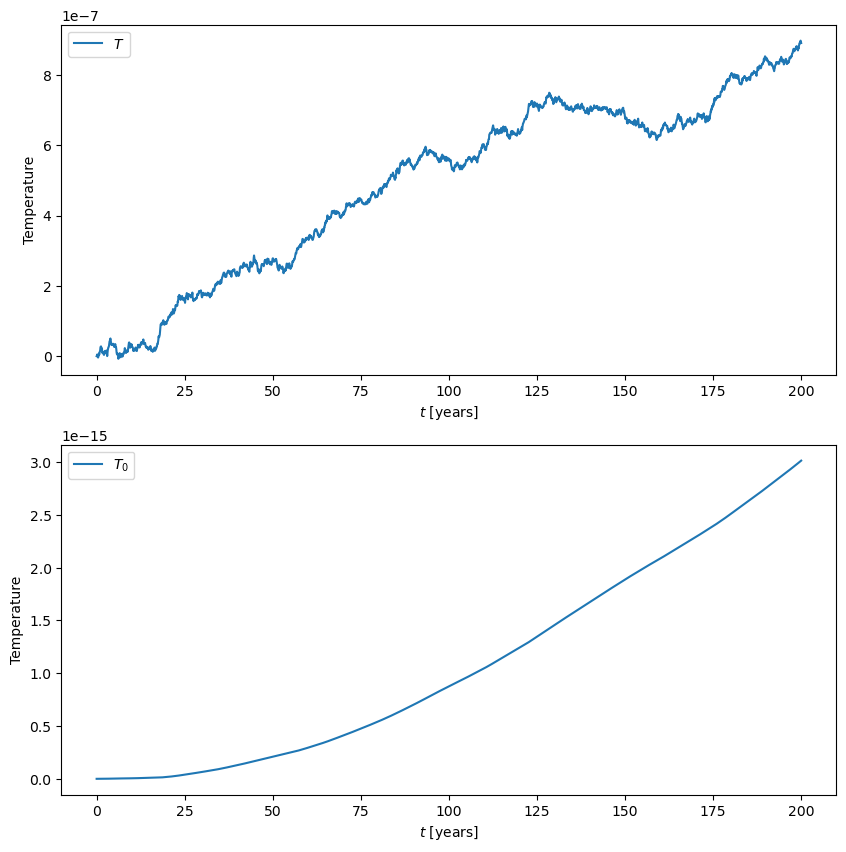

In [28]:
# Case 3: Noisy forcing

t = 0.0 # model time
max_t = 200 # years
dt = 1/12 # one month in years
max_timesteps = int(np.round(max_t/dt))


beta = 1.2 # W m^-2 K^-1
gamma = 0.5 # W m^-2 K^-1

Forcing = 1 + 10*np.random.normal(0, 1, max_timesteps)# np.arange(0,max_timesteps)# W m^-2
Temp = np.zeros(max_timesteps)
Temp_0 = np.zeros(max_timesteps)

# Initialise
Temp[0] = 0.0
Temp_0[0] = 0.0

for timestep in range(max_timesteps-1): 
    F = Forcing[timestep]

    T = Temp[timestep]
    T_0 = Temp_0[timestep]
    Temp[timestep+1] = update_mixed_layer(T, T_0, F, beta, gamma, c, dt)

    T = Temp[timestep+1]
    Temp_0[timestep+1] = update_deep_ocean(T, T_0, gamma, c_0, dt)

    t += dt
    if t > max_t:
        print('Maximum time elapsed')
        break


fig = plt.figure(figsize=[10, 10])

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(np.linspace(0,max_t,max_timesteps), Temp, label='$T$')

ax1.set_xlabel('$t$ [years]')
ax1.set_ylabel('Temperature')
ax1.legend()

ax2.plot(np.linspace(0,max_t,max_timesteps), Temp_0, label='$T_0$')

ax2.set_xlabel('$t$ [years]')
ax2.set_ylabel('Temperature')
ax2.legend()

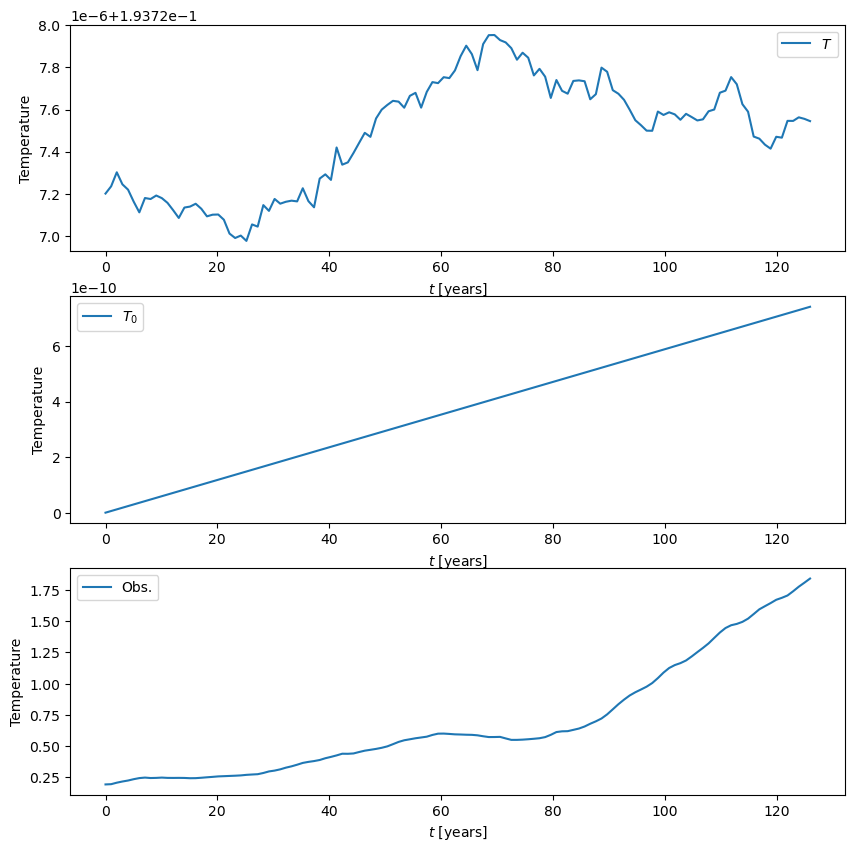

In [62]:
# Case 4: Real forcing
# Develop your best simulation that reproduces the 20th century surface temperature field by choosing the values 
# beta, gamma, size of the noise forcing and depth of the ocean layers that reproduces the observed temperature 
# best using the total forcing (do this qualitatively)

# Read in forcing data
Forcing = np.genfromtxt('data/20thcenturyforcingandobs.csv', delimiter=',')[:,1]
Obs = np.genfromtxt('data/20thcenturyforcingandobs.csv', delimiter=',')[:,4]
#TotalForcing = Forcing[:,1]

t = 0.0 # model time
max_t = len(Forcing) # years
dt = 1 # one month in years
max_timesteps = int(np.round(max_t/dt))


Forcing += 10*np.random.normal(0, 1, max_timesteps)

beta = 1.2 # W m^-2 K^-1
gamma = 0.5 # W m^-2 K^-1


#np.random.normal(0, 1, max_timesteps)# W m^-2
Temp = np.zeros(max_timesteps)
Temp_0 = np.zeros(max_timesteps)

# Initialise
Temp[0] = Obs[0]
Temp_0[0] = 0.0

for timestep in range(max_timesteps-1): 
    F = Forcing[timestep]

    T = Temp[timestep]
    T_0 = Temp_0[timestep]
    Temp[timestep+1] = update_mixed_layer(T, T_0, F, beta, gamma, c, dt)

    T = Temp[timestep+1]
    Temp_0[timestep+1] = update_deep_ocean(T, T_0, gamma, c_0, dt)

    t += dt
    if t > max_t:
        print('Maximum time elapsed')
        break


fig = plt.figure(figsize=[10, 10])

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

ax1.plot(np.linspace(0,max_t,max_timesteps), Temp, label='$T$')
ax3.plot(np.linspace(0,max_t,max_timesteps), Obs, label='Obs.')

ax1.set_xlabel('$t$ [years]')
ax1.set_ylabel('Temperature')
ax1.legend()

ax2.plot(np.linspace(0,max_t,max_timesteps), Temp_0, label='$T_0$')

ax2.set_xlabel('$t$ [years]')
ax2.set_ylabel('Temperature')
ax2.legend()

ax3.set_xlabel('$t$ [years]')
ax3.set_ylabel('Temperature')
ax3.legend()

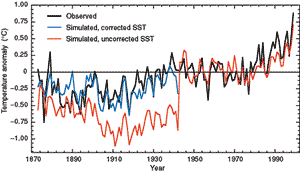

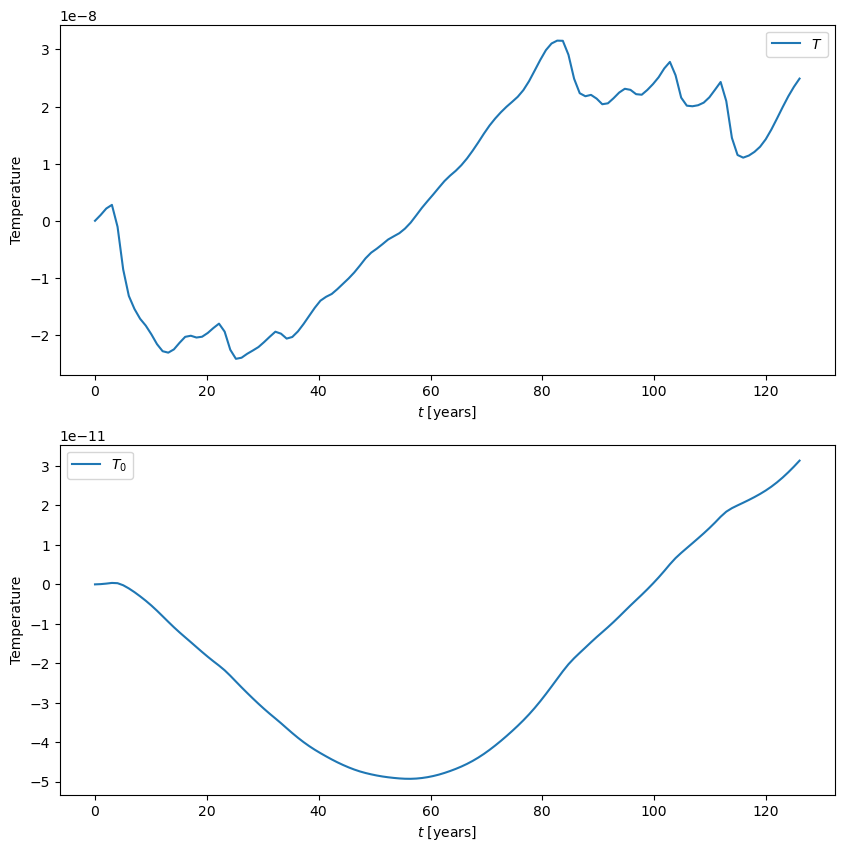

In [76]:
# Natural forcing only

# Case 4: Real forcing
# Develop your best simulation that reproduces the 20th century surface temperature field by choosing the values 
# beta, gamma, size of the noise forcing and depth of the ocean layers that reproduces the observed temperature 
# best using the total forcing (do this qualitatively)

# Read in forcing data
Forcing = np.genfromtxt('data/20thcenturyforcingandobs.csv', delimiter=',')[:,1] - np.genfromtxt('data/20thcenturyforcingandobs.csv', delimiter=',')[:,4]
#TotalForcing = Forcing[:,1]

t = 0.0 # model time
max_t = len(Forcing) # years
dt = 1 # one month in years
max_timesteps = int(np.round(max_t/dt))

#Forcing += 10*np.random.normal(0, 1, max_timesteps)

beta = 1.2 # W m^-2 K^-1
gamma = 1000000.5 # W m^-2 K^-1


#np.random.normal(0, 1, max_timesteps)# W m^-2
Temp = np.zeros(max_timesteps)
Temp_0 = np.zeros(max_timesteps)

# Initialise
Temp[0] = 0.0
Temp_0[0] = 0.0

for timestep in range(max_timesteps-1): 
    F = Forcing[timestep]

    T = Temp[timestep]
    T_0 = Temp_0[timestep]
    Temp[timestep+1] = update_mixed_layer(T, T_0, F, beta, gamma, c, dt)

    T = Temp[timestep+1]
    Temp_0[timestep+1] = update_deep_ocean(T, T_0, gamma, c_0, dt)

    t += dt
    if t > max_t:
        print('Maximum time elapsed')
        break


fig = plt.figure(figsize=[10, 10])

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(np.linspace(0,max_t,max_timesteps), Temp, label='$T$')

ax1.set_xlabel('$t$ [years]')
ax1.set_ylabel('Temperature')
ax1.legend()

ax2.plot(np.linspace(0,max_t,max_timesteps), Temp_0, label='$T_0$')

ax2.set_xlabel('$t$ [years]')
ax2.set_ylabel('Temperature')
ax2.legend()

# Stommel's AMOC box model

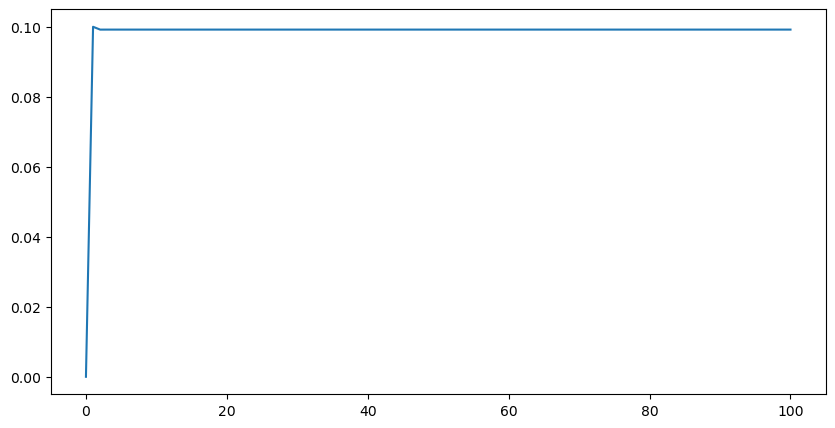

In [95]:
def update_box_model(y, mu, eta):
    dy_dt = mu - y*(1 + eta**2*(1-y)**2)
    return y + dy_dt*dt

t = 0.0 # model time
max_t = 100 # years
dt = 1 # one month in years
#max_timesteps = int(np.round(max_t/dt))
mu = 0.1
eta = 0.1
#Forcing += 10*np.random.normal(0, 1, max_timesteps)

#beta = 1.2 # W m^-2 K^-1
#gamma = 1000000.5 # W m^-2 K^-1


#np.random.normal(0, 1, max_timesteps)# W m^-2
max_timesteps = 100
y = np.zeros(max_timesteps)


for timestep in range(max_timesteps-1): 
    Y = y[timestep]
    y[timestep+1] = update_box_model(Y, mu, eta)

    t += dt
    if t > max_t:
        print('Maximum time elapsed')
        break


fig = plt.figure(figsize=[10, 5])

ax1 = fig.add_subplot(1, 1, 1)
#ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(np.linspace(0,max_t,max_timesteps), y, label='$y$')

# ax1.set_xlabel('$t$ [years]')
# ax1.set_ylabel('Temperature')
# ax1.legend()

# ax2.plot(np.linspace(0,max_t,max_timesteps), Temp_0, label='$T_0$')

# ax2.set_xlabel('$t$ [years]')
# ax2.set_ylabel('Temperature')
# ax2.legend()

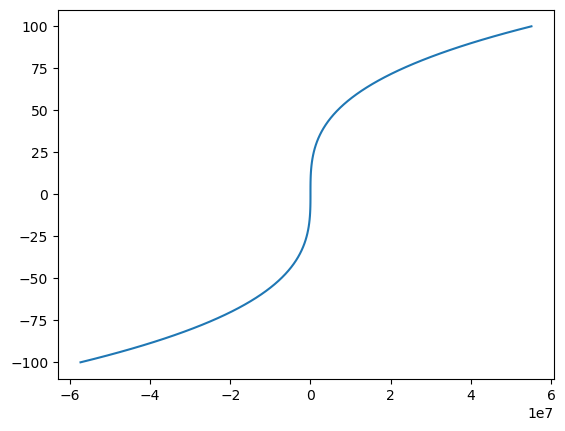

In [127]:
eta = 7.5
mu = 20.0
y = np.linspace(-100,100,100)
big_O = 0.0001
f = y*(1 + eta**2*(1-y)**2 + big_O) 
plt.plot(f, y)

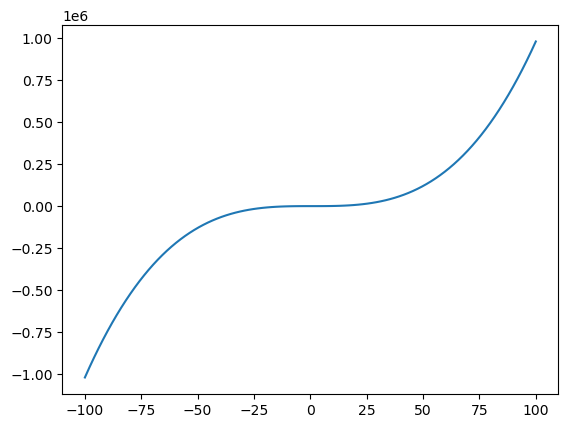

In [138]:
f = (y**2 - 1)*(y-2)
plt.plot(y, f)

In [92]:
mu - y[0]*(1 + eta**2 * (1-y[0])**2)

0.1

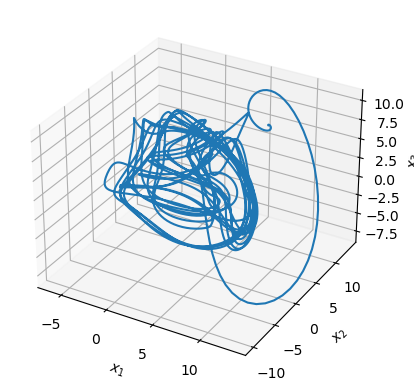

In [152]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

# These are our constants
N = 5  # Number of variables
F = 8  # Forcing


def L96(x, t):
    """Lorenz 96 model with constant forcing"""
    # Setting up vector
    d = np.zeros(N)
    # Loops over indices (with operations and Python underflow indexing handling edge cases)
    for i in range(N):
        d[i] = (x[(i + 1) % N] - x[i - 2]) * x[i - 1] - x[i] + F
    return d


x0 = F * np.ones(N)  # Initial state (equilibrium)
x0[0] += 0.01  # Add small perturbation to the first variable
t = np.arange(0.0, 30.0, 0.01)

x = odeint(L96, x0, t)

# Plot the first three variables
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot(x[:, 0], x[:, 1], x[:, 2])
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
plt.show()

In [77]:

ds = xr.open_dataset('/Users/noahday/GitHub/icepack-dirs/runs/icepackfluff/history/icepack.h.20150101.nc')
ds

<xarray.Dataset>
Dimensions:   (ni: 4, ncat: 5, ntrcr: 22, time: 8760)
Coordinates:
  * ni        (ni) int32 1 2 3 4
  * ncat      (ncat) int32 1 2 3 4 5
  * ntrcr     (ntrcr) int32 1 2 3 4 5 6 7 8 9 10 ... 14 15 16 17 18 19 20 21 22
  * time      (time) object 2015-01-01 01:00:00 ... 2016-01-01 00:00:00
Data variables: (12/39)
    timestep  (time) int32 ...
    date      (time) float64 ...
    aice      (time, ni) float64 ...
    vice      (time, ni) float64 ...
    vsno      (time, ni) float64 ...
    uvel      (time, ni) float64 ...
    ...        ...
    fhocn     (time, ni) float64 ...
    aicen     (time, ncat, ni) float64 ...
    vicen     (time, ncat, ni) float64 ...
    vsnon     (time, ncat, ni) float64 ...
    trcr      (time, ntrcr, ni) float64 ...
    trcrn     (time, ncat, ntrcr, ni) float64 ...

Text(0.5, 0, 'days')

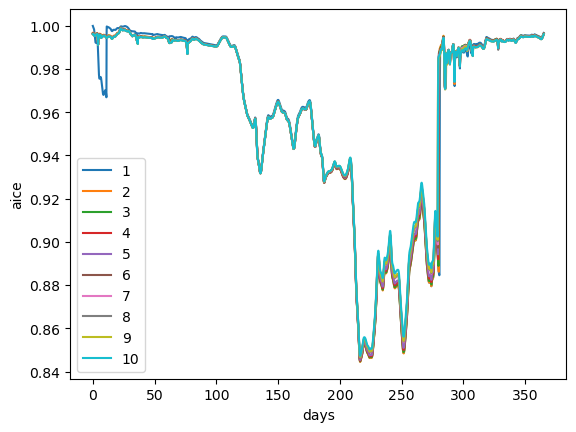

In [63]:
var = 'aice'
column_test = 1
for i in range(1,11):
    plt.plot(np.linspace(0,365,365*24), ds[var][(i-1)*365*24:i*365*24,column_test], label = str(i))
plt.legend()
plt.ylabel(var)
plt.xlabel('days')

Text(0.5, 0, 'days')

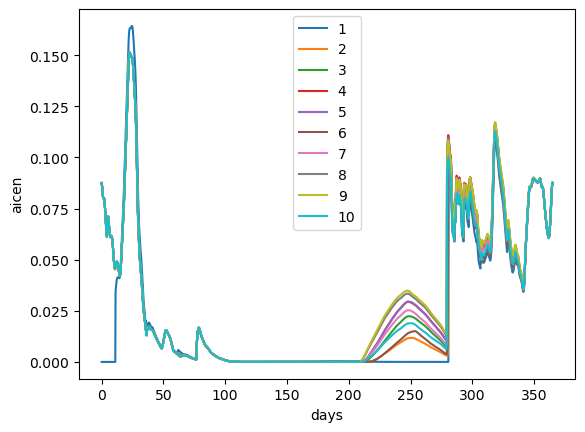

In [64]:
var = 'aicen'
for i in range(1,11):
    plt.plot(np.linspace(0,365,365*24), ds[var][(i-1)*365*24:i*365*24,0, column_test], label = str(i))
plt.legend()
plt.ylabel(var)
plt.xlabel('days')


Text(0.5, 0, 'days')

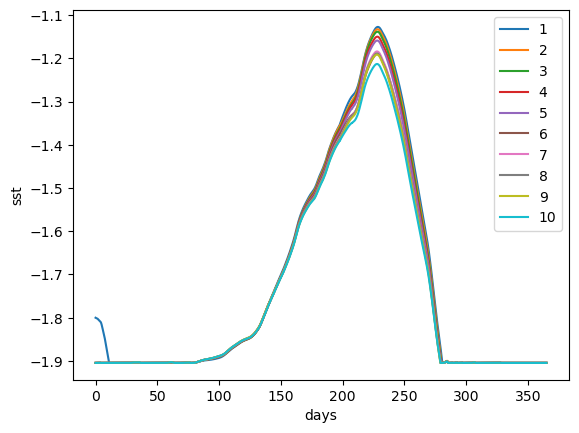

In [65]:
var = 'sst'
for i in range(1,11):
    plt.plot(np.linspace(0,365,365*24), ds[var][(i-1)*365*24:i*365*24,column_test], label = str(i))
plt.legend()
plt.ylabel(var)
plt.xlabel('days')


In [70]:
var = 'd_afsd_newi'
for i in range(1,11):
    plt.plot(np.linspace(0,365,365*24), ds[var][(i-1)*365*24:i*365*24,0,0,column_test], label = str(i))
plt.legend()
plt.ylabel(var)
plt.xlabel('days')


IndexError: too many indices

In [73]:
ds['d_afsd_latg']

<xarray.DataArray 'd_afsd_latg' (time: 87600, nfsd: 1, ni: 4)>
[350400 values with dtype=float64]
Coordinates:
  * ni       (ni) int32 1 2 3 4
  * nfsd     (nfsd) int32 1
  * time     (time) object 2015-01-01 01:00:00 ... 2025-01-01 00:00:00